# 1. DataSet

In [1]:
import pandas as pd
data = pd.read_csv(r'\电信流失\train.csv')

In [2]:
data.head()

,客户ID,地理区域,是否双频,是否翻新机,当前手机价格,手机网络功能,婚姻状况,家庭成人人数,信息库匹配,预计收入,...,客户生命周期内平均月费用,客户生命周期内的平均每月使用分钟数,客户整个生命周期内的平均每月通话次数,过去三个月的平均每月使用分钟数,过去三个月的平均每月通话次数,过去三个月的平均月费用,过去六个月的平均每月使用分钟数,过去六个月的平均每月通话次数,过去六个月的平均月费用,是否流失
0,0,7,0,-1,181,0,2,0,0,3,...,24,286,91,351,121,23,303,101,25,0
1,1,13,1,0,1399,0,3,0,0,0,...,44,447,190,483,199,40,488,202,44,1
2,2,14,1,0,927,0,2,4,0,6,...,48,183,79,271,95,71,209,77,54,0
3,3,1,0,0,232,0,3,-1,1,-1,...,42,303,166,473,226,72,446,219,65,1
4,4,0,-1,0,699,0,1,2,0,3,...,36,119,24,88,15,35,106,21,37,1


DataSet about telecom churn, based on field information to infer whether the user churn.  
一份关于电信流失的数据，根据字段信息推断用户是否流失

# 2. Modeling using Lightgbm

In [3]:
import lightgbm as lgb
label = '是否流失'
x_train = data.drop(label, axis=1)
y_train = data[label]
train_data = lgb.Dataset(x_train, y_train)

lgb_params = {
        'num_leaves': 8, 
        'objective': 'binary',
        'boosting': 'gbdt',
        "random_state": 1
}
model = lgb.train(lgb_params, train_data, 1)  # Only train once

[LightGBM] [Info] Number of positive: 75042, number of negative: 74958
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10871
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500280 -> initscore=0.001120
[LightGBM] [Info] Start training from score 0.001120


Lightgbm generates a decision tree for each training round, and call trees_to_dataframe methods to get information about these decision trees.   
Lightgbm每训练一轮，便会生成一棵决策树，通过调用trees_to_dataframe方法可以返回这些决策树的信息

In [4]:
model.trees_to_dataframe()

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S1,0-S3,None,当前设备使用天数,4392.930176,3.045000e+02,<=,left,None,0.001120,0.000000,150000
1,0,2,0-S1,0-S4,0-S2,0-S0,在职总月数,1030.520020,1.050000e+01,<=,left,None,-0.040437,15156.200000,60625
2,0,3,0-S4,0-L0,0-L5,0-S1,家庭中唯一订阅者的数量,372.462006,1.500000e+00,<=,left,None,-0.070824,6427.500000,25710
3,0,4,0-L0,None,None,0-S4,None,NaN,NaN,None,None,None,-0.085946,4608.748626,18435
4,0,4,0-L5,None,None,0-S4,None,NaN,NaN,None,None,None,-0.032504,1818.749458,7275
5,0,3,0-S2,0-L2,0-S5,0-S1,在职总月数,991.138977,1.550000e+01,<=,left,None,-0.018061,8728.750000,34915
6,0,4,0-L2,None,None,0-S2,None,NaN,NaN,None,None,None,0.029817,2891.499138,11566
7,0,4,0-S5,0-L3,0-L6,0-S2,当前手机价格,317.595001,8.925000e+02,<=,left,None,-0.041778,5837.250000,23349
8,0,5,0-L3,None,None,0-S5,None,NaN,NaN,None,None,None,-0.014442,2459.499267,9838
9,0,5,0-L6,None,None,0-S5,None,NaN,NaN,None,None,None,-0.061682,3377.748993,13511


Visualize the tree  
可视化这棵树

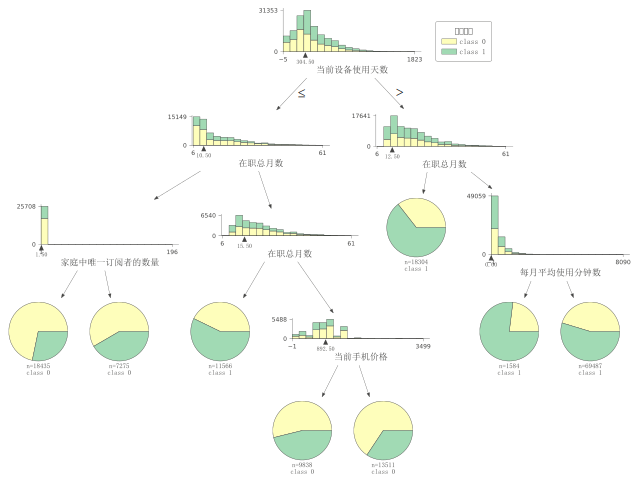

In [5]:
from dtreeviz.models.lightgbm_decision_tree import ShadowLightGBMTree
from dtreeviz.trees import dtreeviz
import warnings
warnings.filterwarnings("ignore")
viz = ShadowLightGBMTree(
               model,
               0,
               x_train,
               y_train,
               target_name=label,
               feature_names=x_train.columns)
dtreeviz(viz, fontname='SimSun')

Different from GBDT, XGBoost and other models, Lightgbm adopts leaf-wise growth strategy, which is based on Leaf growth rather than depth. A num_leaves value of 8 means that the tree will have only eight leaves.  
与GBDT、XGBoost等模型不同的是，Lightgbm采用Leaf-wise生长策略，是按叶子生长而非深度。参数num_leaves为8表示这棵树只会有8个叶子节点

The following describes how Lightgbm calculates gradient, feature bins, splitting, iteration, prediction, and the specific role of some important parameters.  
以下介绍Lightgbm如何计算梯度、特征分箱、分裂、迭代、预测，以及一些重要参数的具体作用

# 3. Loss function and gradient

The gradient calculation formula of Lightgbm binary classification model is listed in line 59-136 under /objective/ binary_objective-hpp.  
计算Lightgbm二分类模型的梯度计算公式在/objective/binary_objective.hpp文件下的第59-136行

``` C++
void Init(const Metadata& metadata, data_size_t num_data) override {
    num_data_ = num_data;  
    label_ = metadata.label();  
    weights_ = metadata.weights();  
    data_size_t cnt_positive = 0;  
    data_size_t cnt_negative = 0;  
    // count for positive and negative samples
    #pragma omp parallel for schedule(static) reduction(+:cnt_positive, cnt_negative)
    for (data_size_t i = 0; i < num_data_; ++i) {
      if (is_pos_(label_[i])) {
        ++cnt_positive;
      } else {
        ++cnt_negative;
      }
    }
    num_pos_data_ = cnt_positive;
    if (Network::num_machines() > 1) {
      cnt_positive = Network::GlobalSyncUpBySum(cnt_positive);
      cnt_negative = Network::GlobalSyncUpBySum(cnt_negative);
    }
    need_train_ = true;
    if (cnt_negative == 0 || cnt_positive == 0) {
      Log::Warning("Contains only one class");
      // not need to boost.
      need_train_ = false;
    }
    Log::Info("Number of positive: %d, number of negative: %d", cnt_positive, cnt_negative);
    // use -1 for negative class, and 1 for positive class
    label_val_[0] = -1; 
    label_val_[1] = 1;
    // weight for label
    label_weights_[0] = 1.0f;
    label_weights_[1] = 1.0f;
    // if using unbalance, change the labels weight
    if (is_unbalance_ && cnt_positive > 0 && cnt_negative > 0) {
      if (cnt_positive > cnt_negative) {
        label_weights_[1] = 1.0f;
        label_weights_[0] = static_cast<double>(cnt_positive) / cnt_negative;
      } else {
        label_weights_[1] = static_cast<double>(cnt_negative) / cnt_positive;
        label_weights_[0] = 1.0f;
      }
    }
    label_weights_[1] *= scale_pos_weight_; 
  }
```

```C++
void GetGradients(const double* score, score_t* gradients, score_t* hessians) const override {
    if (!need_train_) {
      return;
    }
    if (weights_ == nullptr) {
      #pragma omp parallel for schedule(static)
      for (data_size_t i = 0; i < num_data_; ++i) {
        // get label and label weights
        const int is_pos = is_pos_(label_[i]);
        const int label = label_val_[is_pos];
        const double label_weight = label_weights_[is_pos];
        // calculate gradients and hessians
        const double response = -label * sigmoid_ / (1.0f + std::exp(label * sigmoid_ * score[i]));
        const double abs_response = fabs(response);
        gradients[i] = static_cast<score_t>(response * label_weight);
        hessians[i] = static_cast<score_t>(abs_response * (sigmoid_ - abs_response) * label_weight);
      }
    } else {
      #pragma omp parallel for schedule(static)
      for (data_size_t i = 0; i < num_data_; ++i) {
        // get label and label weights
        const int is_pos = is_pos_(label_[i]);
        const int label = label_val_[is_pos];
        const double label_weight = label_weights_[is_pos];
        // calculate gradients and hessians
        const double response = -label * sigmoid_ / (1.0f + std::exp(label * sigmoid_ * score[i]));
        const double abs_response = fabs(response);
        gradients[i] = static_cast<score_t>(response * label_weight  * weights_[i]);
        hessians[i] = static_cast<score_t>(abs_response * (sigmoid_ - abs_response) * label_weight * weights_[i]);
      }
    }
  }
```

Assuming that the weights_ parameter is not used and sigmoid_ uses the default value 1.0, the formula for the $I $th sample loss function, gradient, and hessian(second order gradient) is as follows.  
假设不使用weights_参数，并且sigmoid_使用默认值1.0，那么第$i$个样本的损失函数、一阶梯度与二阶梯度的计算公式如下所示

Loss Function  
$$L(s)_i = log(1 + exp(-y_is_i))$$ 
Gradient 
$$R_i = \frac{-y_i}{1 + exp(y_is_i)}$$
$$g_i = R_i * w_i$$
Hessian
$$h_i = |R_i| * (1 -|R_i|) * w_i$$
where $s$ is score, $y$ is label, $w$ is weight  
其中$s$($score$)为得分，$y$为标签，$w$为权重

Define the function that calculates the gradient  
定义计算梯度的函数

In [1]:
import numpy as np
def GetGradients(label, score, weight):
    response = -label / (1 + np.exp(label * score))
    gradients = response * weight
    hessians = abs(response) * (1 - abs(response)) * weight
    return gradients, hessians

At the same time, print out part of the log and add the following at line 121 of the above source code (just select the first few lines for observation).   
与此同时，打印出部分日志，在上述源码第121行添加以下内容 (只选取前几行进行观察) 
``` C++
if (weights_ == nullptr) {
      #pragma omp parallel for schedule(static)
      for (data_size_t i = 0; i < num_data_; ++i) {
...
        if (i <= 10){
                   Log::Info("label: %d, gradients: %f, hessians: %f", label, gradients[i], hessians[i]);
                }
      }
}
...
```

The simplest model  
一个最简单的建模

In [6]:
x_train = data[['当前设备使用天数']]  # Only choose one field
y_train = data[label]
train_data = lgb.Dataset(x_train, y_train)

In [4]:
lgb_params = {
        'num_leaves': 2, # Only split once
        'objective': 'binary',
        'boosting': 'gbdt',
#         'lambda_l1': 0.1,
#         'lambda_l2': 0.1,
        'learning_rate': 0.01,
        "metric": 'auc',
        "verbosity": 1,
        "num_threads": 8,
        "scale_pos_weight": 2.5,
        "random_state": 1
}
model = lgb.train(lgb_params, train_data, 1) # Only train once

[LightGBM] [Info] Number of positive: 75042, number of negative: 74958
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500280 -> initscore=0.001120
[LightGBM] [Info] Start training from score 0.001120
[LightGBM] [Info] label: -1, gradients: 0.500280, hessians: 0.250000
[LightGBM] [Info] label: 1, gradients: -1.249300, hessians: 0.625000
[LightGBM] [Info] label: -1, gradients: 0.500280, hessians: 0.250000
[LightGBM] [Info] label: 1, gradients: -1.249300, hessians: 0.625000
[LightGBM] [Info] label: 1, gradients: -1.249300, hessians: 0.625000
[LightGBM] [Info] label: 1, gradients: -1.249300, hessians: 0.625000
[LightGBM] [Info] label: 1, 

Lightgbm will give you an init_score (if you don't specify it), which simply takes the number of positive samples over the total, and then inverts the sigmoid function. In this case:  
Lightgbm会给出初始得分init_score（如果你不指定的话），它是直接拿正样本个数比总数，再取sigmoid函数逆运算。在此例中：

In [4]:
pos_cnt = data[data[label] == 1].shape[0]
data_cnt = data.shape[0]
pavg = pos_cnt / data_cnt
init_score = np.log(pavg / (1 - pavg))
print(f'pavg: {pavg}, init_score: {init_score}')

pavg: 0.50028, init_score: 0.0011200001170771656


Find the gradients of positive sample and negative sample respectively.  
分别求出正样本与负样本的梯度

In [5]:
pos_g, pos_h = GetGradients(1, init_score, 2.5)
neg_g, neg_h = GetGradients(-1, init_score, 1.0)
print(f'positive gradients: {pos_g}, positive hessians : {pos_h}')
print(f'negtive gradients: {neg_g}, negative hessians : {neg_h}')

positive gradients: -1.2493, positive hessians : 0.6249998040000001
negtive gradients: 0.50028, negative hessians : 0.2499999216


# 4. FeatureBins

Lightgbm bins features before splitting them. The source code is listed in line 256-312 under/IO/bin.cpp  
Lightgbm对特征进行分裂之前，会预先对特征进行分箱，源码在/io/bin.cpp下的第256-312行

``` C++
std::vector<double> FindBinWithZeroAsOneBin(const double* distinct_values, const int* counts, int num_distinct_values,
                                              int max_bin, size_t total_sample_cnt, int min_data_in_bin) {
    std::vector<double> bin_upper_bound;
    int left_cnt_data = 0;
    int cnt_zero = 0;
    int right_cnt_data = 0;
    for (int i = 0; i < num_distinct_values; ++i) {
      if (distinct_values[i] <= -kZeroThreshold) {
        left_cnt_data += counts[i];
      } else if (distinct_values[i] > kZeroThreshold) {
        right_cnt_data += counts[i];
      } else {
        cnt_zero += counts[i];
      }
    }

    int left_cnt = -1;
    for (int i = 0; i < num_distinct_values; ++i) {
      if (distinct_values[i] > -kZeroThreshold) {
        left_cnt = i;
        break;
      }
    }

    if (left_cnt < 0) {
      left_cnt = num_distinct_values;
    }

    if ((left_cnt > 0) && (max_bin > 1)) {
      int left_max_bin = static_cast<int>(static_cast<double>(left_cnt_data) / (total_sample_cnt - cnt_zero) * (max_bin - 1));
      left_max_bin = std::max(1, left_max_bin);
      bin_upper_bound = GreedyFindBin(distinct_values, counts, left_cnt, left_max_bin, left_cnt_data, min_data_in_bin);
      if (bin_upper_bound.size() > 0) {
        bin_upper_bound.back() = -kZeroThreshold;
      }
    }

    int right_start = -1;
    for (int i = left_cnt; i < num_distinct_values; ++i) {
      if (distinct_values[i] > kZeroThreshold) {
        right_start = i;
        break;
      }
    }

    int right_max_bin = max_bin - 1 - static_cast<int>(bin_upper_bound.size());
    if (right_start >= 0 && right_max_bin > 0) {
      auto right_bounds = GreedyFindBin(distinct_values + right_start, counts + right_start,
        num_distinct_values - right_start, right_max_bin, right_cnt_data, min_data_in_bin);
      bin_upper_bound.push_back(kZeroThreshold);
      bin_upper_bound.insert(bin_upper_bound.end(), right_bounds.begin(), right_bounds.end());
    } else {
      bin_upper_bound.push_back(std::numeric_limits<double>::infinity());
    }
    CHECK_LE(bin_upper_bound.size(), static_cast<size_t>(max_bin));
    return bin_upper_bound;
  }
```

Add the following log content at line 311 of the above source code:  
在上述源码第311行添加以下日志内容：

``` C++
...
CHECK_LE(bin_upper_bound.size(), static_cast<size_t>(max_bin));
for(int i = 0; i < bin_upper_bound.size(); ++i){
        Log::Info("the %d bins: %f", i, bin_upper_bound[i]);
    }
return bin_upper_bound;
...
```

In [4]:
lgb_params = {
        'num_leaves': 2, 
        'objective': 'binary',
        'boosting': 'gbdt',
#         'lambda_l1': 0.1,
        'learning_rate': 0.01,
        "metric": 'auc',
        "verbosity": 1,
        "num_threads": 8,
        "scale_pos_weight": 2.5,
        "random_state": 1
}
model = lgb.train(lgb_params, train_data, 1) 

[LightGBM] [Info] the 0 bins: -0.000000
[LightGBM] [Info] the 1 bins: 0.000000
[LightGBM] [Info] the 2 bins: 7.500000
[LightGBM] [Info] the 3 bins: 13.500000
[LightGBM] [Info] the 4 bins: 19.500000
[LightGBM] [Info] the 5 bins: 25.500000
[LightGBM] [Info] the 6 bins: 30.500000
[LightGBM] [Info] the 7 bins: 35.500000
[LightGBM] [Info] the 8 bins: 40.500000
[LightGBM] [Info] the 9 bins: 45.500000
[LightGBM] [Info] the 10 bins: 50.500000
[LightGBM] [Info] the 11 bins: 55.500000
[LightGBM] [Info] the 12 bins: 60.500000
[LightGBM] [Info] the 13 bins: 65.500000
[LightGBM] [Info] the 14 bins: 69.500000
[LightGBM] [Info] the 15 bins: 74.500000
[LightGBM] [Info] the 16 bins: 79.500000
[LightGBM] [Info] the 17 bins: 83.500000
[LightGBM] [Info] the 18 bins: 88.500000
[LightGBM] [Info] the 19 bins: 92.500000
[LightGBM] [Info] the 20 bins: 96.500000
[LightGBM] [Info] the 21 bins: 100.500000
[LightGBM] [Info] the 22 bins: 104.500000
[LightGBM] [Info] the 23 bins: 108.500000
[LightGBM] [Info] the 24 

# 5. How to split

Finding the optimal split point, calculating the split threshold, calculating the split gain, and calculating the output are listed in lines 880-1083 under/treelearner/feature_histograph.hpp  
寻找最优分割点、计算分裂阈值、计算分裂收益以及计算输出在/treelearner/feature_histogram.hpp下的第880-1083行

``` C++
if (REVERSE) {
      double sum_right_gradient = 0.0f;
      double sum_right_hessian = kEpsilon;
      data_size_t right_count = 0;

      int t = meta_->num_bin - 1 - offset - NA_AS_MISSING;
      const int t_end = 1 - offset;

      // from right to left, and we don't need data in bin0
      for (; t >= t_end; --t) {
        ...
        const auto grad = GET_GRAD(data_, t);
        const auto hess = GET_HESS(data_, t);
        data_size_t cnt =
            static_cast<data_size_t>(Common::RoundInt(hess * cnt_factor));
        sum_right_gradient += grad;
        sum_right_hessian += hess;
        right_count += cnt;
        ...
        // current split gain
        double current_gain = GetSplitGains<USE_MC, USE_L1, USE_MAX_OUTPUT, USE_SMOOTHING>(
            sum_left_gradient, sum_left_hessian, sum_right_gradient,
            sum_right_hessian, meta_->config->lambda_l1,
            meta_->config->lambda_l2, meta_->config->max_delta_step,
            constraints, meta_->monotone_type, meta_->config->path_smooth,
            left_count, right_count, parent_output);
        // gain with split is worse than without split
        if (current_gain <= min_gain_shift) {
          continue;
        }

        // mark as able to be split
        is_splittable_ = true;
        // better split point
        if (current_gain > best_gain) {
          if (USE_MC) {
            best_right_constraints = constraints->RightToBasicConstraint();
            best_left_constraints = constraints->LeftToBasicConstraint();
            if (best_right_constraints.min > best_right_constraints.max ||
                best_left_constraints.min > best_left_constraints.max) {
              continue;
            }
          }
          best_left_count = left_count;
          best_sum_left_gradient = sum_left_gradient;
          best_sum_left_hessian = sum_left_hessian;
          // left is <= threshold, right is > threshold.  so this is t-1
          best_threshold = static_cast<uint32_t>(t - 1 + offset);
          best_gain = current_gain;
        }
      }
    } else {...}
    if (is_splittable_ && best_gain > output->gain + min_gain_shift) {
      // update split information
      output->threshold = best_threshold;
      output->left_output =
          CalculateSplittedLeafOutput<USE_MC, USE_L1, USE_MAX_OUTPUT, USE_SMOOTHING>(
              best_sum_left_gradient, best_sum_left_hessian,
              meta_->config->lambda_l1, meta_->config->lambda_l2,
              meta_->config->max_delta_step, best_left_constraints, meta_->config->path_smooth,
              best_left_count, parent_output);
      output->left_count = best_left_count;
      output->left_sum_gradient = best_sum_left_gradient;
      output->left_sum_hessian = best_sum_left_hessian - kEpsilon;
      output->right_output =
          CalculateSplittedLeafOutput<USE_MC, USE_L1, USE_MAX_OUTPUT, USE_SMOOTHING>(
              sum_gradient - best_sum_left_gradient,
              sum_hessian - best_sum_left_hessian, meta_->config->lambda_l1,
              meta_->config->lambda_l2, meta_->config->max_delta_step,
              best_right_constraints, meta_->config->path_smooth, num_data - best_left_count,
              parent_output);
      output->right_count = num_data - best_left_count;
      output->right_sum_gradient = sum_gradient - best_sum_left_gradient;
      output->right_sum_hessian =
          sum_hessian - best_sum_left_hessian - kEpsilon;
      output->gain = best_gain - min_gain_shift;
      output->default_left = REVERSE;
    }
  }
```

We can just focus on the content under the if (REVERSE) (it traverses backwards); The large number of break and continue statements can be ignored because of algorithmic optimization.    
我们可以只关注if (REVERSE)下的内容（它是从后往前遍历）；大量的break, continue语句是为了算法上的优化，可以忽略

Add the following log at line 942 to see which bins were counted and some of the output of those bins.  
在第942行添加以下日志，观察有计算了哪些bins，以及这些bins的一些输出

``` C++
...
if (current_gain <= min_gain_shift) {
  continue;
}
Log::Info("the %d bins, current_gain: %f, min_gain_shift: %f", t, current_gain, min_gain_shift);
// mark as able to be split
is_splittable_ = true;
// better split point
if (current_gain > best_gain) {
    ...
```

In [4]:
lgb_params = {
        'num_leaves': 2, # 只分裂一次
        'objective': 'binary',
        'boosting': 'gbdt',
#         'lambda_l1': 0.1,
        'learning_rate': 0.01,
        "metric": 'auc',
        "verbosity": 1,
        "num_threads": 8,
        "scale_pos_weight": 2.5,
        "random_state": 1
}
model = lgb.train(lgb_params, train_data, 1) # 只训练一轮

[LightGBM] [Info] Number of positive: 75042, number of negative: 74958
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500280 -> initscore=0.001120
[LightGBM] [Info] Start training from score 0.001120
[LightGBM] [Info] the 254 bins, current_gain: 48203.758195, min_gain_shift: 48202.698271
[LightGBM] [Info] the 253 bins, current_gain: 48229.646654, min_gain_shift: 48202.698271
[LightGBM] [Info] the 252 bins, current_gain: 48273.297074, min_gain_shift: 48202.698271
[LightGBM] [Info] the 251 bins, current_gain: 48293.509786, min_gain_shift: 48202.698271
[LightGBM] [Info] the 250 bins, current_gain: 48313.677387, min_gain_shift: 48202.6982

Lines 945 to 961 take the maximum value of these current_gains as the final output.  
第945-961行会对计算出的这些current_gain取最大值，作为最终的输出

Add the following log at line 1081 to observe some of the results of the final output.  
在第1081行添加以下日志观察最终输出的一些结果

``` C++
...
if (is_splittable_ && best_gain > output->gain + min_gain_shift) {
     ...
    output->default_left = REVERSE;
    Log::Info(
        "the %d bins, left_output: %f, left_sum_gradient: %f, left_sum_hessian: %f, right_output: %f "
         "right_sum_gradient: %f, right_sum_hessian: %f, best_gain: %f, min_gain_shift: %f", best_threshold, output->left_output,
         best_sum_left_gradient, output->left_sum_hessian, output->right_output, output->right_sum_gradient, output->right_sum_hessian,           best_gain, min_gain_shift);
}
...
```

In [4]:
lgb_params = {
        'num_leaves': 2, # 只分裂一次
        'objective': 'binary',
        'boosting': 'gbdt',
#         'lambda_l1': 0.1,
        'learning_rate': 0.01,
        "metric": 'auc',
        "verbosity": 1,
        "num_threads": 8,
        "scale_pos_weight": 2.5,
        "random_state": 1
}
model = lgb.train(lgb_params, train_data, 1) # 只训练一轮

[LightGBM] [Info] Number of positive: 75042, number of negative: 74958
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500280 -> initscore=0.001120
[LightGBM] [Info] Start training from score 0.001120
[LightGBM] [Info] the 90 bins, left_output: 0.484721, left_sum_gradient: -11714.681226, left_sum_hessian: 24167.867976, right_output: 1.073842 right_sum_gradient: -44535.299668, right_sum_hessian: 41472.863020, best_gain: 53502.228498, min_gain_shift: 48202.698271


Output the decision tree.  
输出这颗决策树

In [7]:
tree = model.trees_to_dataframe()
tree

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-L0,0-L1,None,当前设备使用天数,5299.529785,304.5,<=,left,None,0.001120,0.000000,150000
1,0,2,0-L0,None,None,0-S0,None,NaN,NaN,None,None,None,0.005967,24167.867976,60625
2,0,2,0-L1,None,None,0-S0,None,NaN,NaN,None,None,None,0.011858,41472.863020,89375


For the log printed above, current_gain is maximum when the bins is 91, so the best_bins here is 90 (left is <= threshold, right is > threshold.so this is t-1), And the 90th bins has a value of 304.5, so its threshold is 304.5. The value is $best\_gain-min\_gain\_shift = 53502.228498-48202.698271=5299.530226999996$   
由前述打印的日志，当bins取91时，current_gain最大，所以这里的best_bins为90（left is <= threshold, right is > threshold.  so this is t-1），
而第90个bins对应的值为304.5，因此其threshold为304.5。split_gain的取值是$best\_gain-min\_gain\_shift = 53502.228498-48202.698271=5299.530226999996$。

# 6. Calculating output formula

## 6.1 Sum of gradient

Sum of gradient of the left node  
$$G_{L}=\sum_{i=0}^mg_i$$
Sum of hessian of the left node  
$$H_{L}=\sum_{i=0}^mh_i$$
Sum of gradient the right node   
$$G_{R}=\sum_{j=0}^ng_j$$
Sum of hessian the right node  
$$H_{R}=\sum_{j=0}^nh_j$$
Let that the sum of the gradient and the hessian of the parent node are   
$$G_P = G_L + G_R$$
$$H_P = H_L + H_R$$

Defines a function that calculates the sum of gradient  
定义计算梯度和的函数

In [6]:
def cal_sum_g_h(data, feature, threshold, pos_g, neg_g, pos_h, neg_h):
    data_left = data[data[feature] <= threshold]
    data_right = data[data[feature] > threshold]
    left_count = data_left.shape[0]
    left_pos_count = data_left[data_left[label] == 1].shape[0]
    left_neg_count = left_count - left_pos_count
    right_count = data_right.shape[0]
    right_pos_count = data_right[data_right[label] == 1].shape[0]
    right_neg_count = right_count - right_pos_count
    sum_g_left = left_pos_count * pos_g + left_neg_count * neg_g
    sum_h_left = left_pos_count * pos_h + left_neg_count * neg_h
    sum_g_right = right_pos_count * pos_g + right_neg_count * neg_g
    sum_h_right = right_pos_count * pos_h + right_neg_count * neg_h
    return sum_g_left, sum_h_left, sum_g_right, sum_h_right

In [7]:
sum_g_left, sum_h_left, sum_g_right, sum_h_right = cal_sum_g_h(data, '当前设备使用天数', 304.5, pos_g, neg_g, pos_h, neg_h)
print(
    f' left_sum_gradient: {sum_g_left}, \n left_sum_hessian: {sum_h_left}, \n'
    f' right_sum_gradient: {sum_g_right}, \n right_sum_hessian: {sum_h_right}')

 left_sum_gradient: -11714.681980000005, 
 left_sum_hessian: 24167.867420954404, 
 right_sum_gradient: -44535.30038, 
 right_sum_hessian: 41472.86199410641


## 6.2 $output$

$output$ calculation formula is listed in line 764-737 under  /treelearner/feature_histogram.hpp.  
$output$计算公式在/treelearner/feature_histogram.hpp下的第737-764行

``` C++
static double ThresholdL1(double s, double l1) {
   const double reg_s = std::max(0.0, std::fabs(s) - l1);
   return Common::Sign(s) * reg_s;
  }

template <bool USE_L1, bool USE_MAX_OUTPUT, bool USE_SMOOTHING>
  static double CalculateSplittedLeafOutput(double sum_gradients,
                                            double sum_hessians, double l1,
                                            double l2, double max_delta_step,
                                            double smoothing, data_size_t num_data,
                                            double parent_output) {
    double ret;
    if (USE_L1) {
      ret = -ThresholdL1(sum_gradients, l1) / (sum_hessians + l2);
    } else {
      ret = -sum_gradients / (sum_hessians + l2);
    }
    ...
```

The sum of gradient after $\lambda_1$ regularization
$$reg_L = sign(G_L)max(0, |G_L| - \lambda_1)$$
$$reg_R = sign(G_R)max(0, |G_R| - \lambda_1)$$
where $sign$ is symbolic function  
$$\begin{equation}
sign(x)=\left\{
\begin{array}{rcl}
-1 && {x < 0} \\
0  && {x = 0} \\
1  && {x > 0} \\
\end{array} \right.
\end{equation}
$$
so that $output$ is
$$O_L = \frac{-reg_L}{H_L + \lambda_2}$$
$$O_R = \frac{-reg_R}{H_R + \lambda_2}$$
Meanwhile, the $output$ of the parent node is denoted as
$$reg_P = sign(G_P)max(0, |G_P| - \lambda_1)$$
$$O_P = \frac{-reg_P}{H_P + \lambda_2}$$

Define the function that calculates $output$  
定义计算$output$函数

In [8]:
def ThresholdL1(s, l1):
    reg_s = max(0.0, abs(s) - l1)
    return np.sign(s) * reg_s


def CalculateSplittedLeafOutput(sum_gradients, sum_hessians, l1=None, l2=0):
    if l1 is None:
        ret = -sum_gradients / (sum_hessians + l2)
    else:
        ret = -ThresholdL1(sum_gradients, l1) / (sum_hessians + l2)
    return ret

In [9]:
left_output = CalculateSplittedLeafOutput(sum_g_left, sum_h_left)
right_output = CalculateSplittedLeafOutput(sum_g_right, sum_h_right)
print(f'left_output: {left_output}, right_output: {right_output}')

left_output: 0.4847213771887443, right_output: 1.073841983375268


## 6.3 $min\_gain\_shift$

source code  
源代码

``` C++
double gain_shift = GetLeafGainGivenOutput<true>(
        sum_gradient, sum_hessian, meta_->config->lambda_l1, meta_->config->lambda_l2, parent_output);
double min_gain_shift = gain_shift + meta_->config->min_gain_to_split;
```

``` C++
  template <bool USE_L1>
  static double GetLeafGainGivenOutput(double sum_gradients,
                                       double sum_hessians, double l1,
                                       double l2, double output) {
    if (USE_L1) {
      const double sg_l1 = ThresholdL1(sum_gradients, l1);
      return -(2.0 * sg_l1 * output + (sum_hessians + l2) * output * output);
    } else {
      return -(2.0 * sum_gradients * output +
               (sum_hessians + l2) * output * output);
    }
  }
```

In fact, it is the formula for calculating $gain$, and calculate the $gain$ of the left and right child nodes and the parent node respectively.  
实际上它即是计算$gain$的公式，分别计算出左右子节点以及父亲节点的$gain$  
$$gain_L = -(2reg_LO_L + (H_L + \lambda_2)O_L^2)$$
$$gain_R = -(2reg_RO_R + (H_R + \lambda_2)O_R^2)$$
$$gain_P = -(2reg_PO_P + (H_P + \lambda_2)O_P^2)$$

Define a function that calculates $gain$  
定义计算$gain$的函数

In [11]:
def GetLeafGainGivenOutput(sum_gradients, sum_hessians, l1=None, l2=0):
    output = CalculateSplittedLeafOutput(sum_gradients, sum_hessians, l1, l2)
    if l1 is None:
        return -(2.0 * sum_gradients * output + (sum_hessians + l2) * output * output)
    else:
        sg_l1 = ThresholdL1(sum_gradients, l1)
        return -(2.0 * sg_l1 * output + (sum_hessians + l2) * output * output)

Calculate the $gain$ of the left and right child nodes and the parent node  
求出左右子节点以及父亲节点的$gain$

In [16]:
gain_left = GetLeafGainGivenOutput(sum_g_left, sum_h_left)
gain_right = GetLeafGainGivenOutput(sum_g_right, sum_h_right)
gain_parent = GetLeafGainGivenOutput(sum_g_right + sum_g_left, sum_h_right + sum_h_left)
print(f'best_gain: {gain_left + gain_right}, gain_shift: {gain_parent}')

best_gain: 53502.2320729463, gain_shift: 48202.70194581873


# 7. How the iteration

Observe how the gradient, $value$ are updated during the iteration.  
观察在迭代过程中如何更新梯度、$value$

For verification purposes, add the following log at line 121 of /objective/binary_objective.hpp  
需要部分日志以做验证，在/objective/binary_objective.hpp第121行添加以下日志
``` C++
if (weights_ == nullptr) {
      #pragma omp parallel for schedule(static)
      for (data_size_t i = 0; i < num_data_; ++i) {
...
        if (i < 5){
                  Log::Info("label: %d, score: %f, gradients: %f, hessians: %f", label, score[i], gradients[i], hessians[i]);
                }
      }
}
...
```

Add the following log at line 1081 of the /treelearner/feature_histogram. cpp   
在/treelearner/feature_histogram.cpp添加第1081行添加以下日志
``` C++
...
if (is_splittable_ && best_gain > output->gain + min_gain_shift) {
     ...
    output->default_left = REVERSE;
    Log::Info(
        "the %d bins, left_output: %f, left_sum_gradient: %f, left_sum_hessian: %f, right_output: %f "
         "right_sum_gradient: %f, right_sum_hessian: %f, best_gain: %f, min_gain_shift: %f", best_threshold, output->left_output,
         best_sum_left_gradient, output->left_sum_hessian, output->right_output, output->right_sum_gradient, output->right_sum_hessian,           best_gain, min_gain_shift);
}
...
```

In [4]:
lgb_params = {
        'num_leaves': 2, # 只分裂一次
        'objective': 'binary',
        'boosting': 'gbdt',
#         'lambda_l1': 0.1,
        'learning_rate': 0.1,
        "metric": 'auc',
        "verbosity": 1,
        "num_threads": 8,
        "scale_pos_weight": 2.5,
        "random_state": 1
}
model = lgb.train(lgb_params, train_data, 5)

[LightGBM] [Info] Number of positive: 75042, number of negative: 74958
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500280 -> initscore=0.001120
[LightGBM] [Info] Start training from score 0.001120
[LightGBM] [Info] label: -1, score: 0.001120, gradients: 0.500280, hessians: 0.250000
[LightGBM] [Info] label: 1, score: 0.001120, gradients: -1.249300, hessians: 0.625000
[LightGBM] [Info] label: -1, score: 0.001120, gradients: 0.500280, hessians: 0.250000
[LightGBM] [Info] label: 1, score: 0.001120, gradients: -1.249300, hessians: 0.625000
[LightGBM] [Info] label: 1, score: 0.001120, gradients: -1.249300, hessians: 0.625000
[LightGBM] [

Output the five decision trees  
输出这五棵决策树

In [5]:
model.trees_to_dataframe()

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-L0,0-L1,None,当前设备使用天数,5299.529785,304.5,<=,left,None,0.001120,0.000000,150000
1,0,2,0-L0,None,None,0-S0,None,NaN,NaN,None,None,None,0.049592,24167.867976,60625
2,0,2,0-L1,None,None,0-S0,None,NaN,NaN,None,None,None,0.108504,41472.863020,89375
3,1,1,1-S0,1-L0,1-L1,None,当前设备使用天数,4329.669922,304.5,<=,left,None,0.000000,0.000000,150000
4,1,2,1-L0,None,None,1-S0,None,NaN,NaN,None,None,None,0.043653,24153.022360,60625
5,1,2,1-L1,None,None,1-S0,None,NaN,NaN,None,None,None,0.096941,41351.048228,89375
6,2,1,2-S0,2-L0,2-L1,None,当前设备使用天数,3594.139893,301.5,<=,left,None,0.000000,0.000000,150000
7,2,2,2-L0,None,None,2-S0,None,NaN,NaN,None,None,None,0.038982,23783.391315,59843
8,2,2,2-L1,None,None,2-S0,None,NaN,NaN,None,None,None,0.087767,41370.344988,90157
9,3,1,3-S0,3-L0,3-L1,None,当前设备使用天数,3006.320068,304.5,<=,left,None,0.000000,0.000000,150000


## 7.1 calculate $value$

The $value$ of each node is related to its $output$, the specific formula is  
每个节点的$value$值与它的$output$有关，具体公式是
$$V_L = O_Llr$$
$$V_R = O_Rlr$$
where $lr$ is learning_rate

In this example, $lr$ is 0.1, then in five iterations, the $value$ of the left node is $0.048472$, $0.043653$, $0.0389823$, $0.03547$, $0.031707$, same thing for the right node  
在此例中，$lr$的值为0.1，那么五次迭代中，左节点的$value$值依次为：$0.048472$, $0.043653$, $0.0389823$, $0.03547$, $0.031707$, 右节点同理

## 7.2 update $score$

Since recalculating the gradient requires $score$, you need to understand how to update $score$  
因为重新计算梯度需要用到$score$，因此需要理解如何更新$score$

The latest $score$is the sum of all the $value$ that has ever landed on that node  
最新的$score$是曾落在该节点上所有的$value$之和
$$s_{L} = \sum_{i=0}^nV_{Li}$$
$V_{Li}$is the $value$ corresponding to the $i$ tree  
$V_{Li}$是第$i$棵树上对应的$value$

In this case, $init\_score$ is $0.00112$, then in five iterations, the $score$ of the left node is:  
在此例中， $init\_score$为$0.00112$，那么五次迭代中，左节点的$score$值依次为：  
$0.48472+0.00112=0.049592$,  
$0.049592+0.043653=0.093245$,   
$0.093245+0.0389823=0.1322273$,  
$0.1322273+0.03547=0.1676973$,   
$0.1676973+0.031707=0.1994043$,  
Same thing for the right node  
右节点同理

## 7.3 predict

Prediction is to take sigmoid activation function for the $score$ of each leaf node. In this case, the probability value of falling on the left child node is $\frac{1}{1 + exp(-0.1994043)}=0.5496866$, same thing for the right node  
预测即是对每棵叶子节点的$score$取sigmoid激活函数，在此例中，落于左子节点的概率值为: $\frac{1}{1 + exp(-0.1994043)}=0.5496866$, 右节点同理